In [6]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

import os
import math
import random

In [7]:
# run if you want to use the whole train/test dataset
df = pd.read_csv("training_set_VU_DM.csv")
display(df.describe())

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [8]:
#files as pickle, small dataset
import pickle as pkl

with open('df_small_train.pkl','wb') as infile:
         pkl.dump(df, infile)


In [9]:
with open('df_small_train.pkl','rb') as infile:
        train_small_pkl = pkl.load(infile)

In [10]:
# Change time information to year and month columns
train_small_pkl["date_time"] = pd.to_datetime(train_small_pkl["date_time"])
train_small_pkl["year"] = train_small_pkl["date_time"].dt.year
train_small_pkl["month"] = train_small_pkl["date_time"].dt.month

Testing correlations

In [125]:
# test

# Correlation heatmap of dataset
def correlation_heatmap(df, title):
    sns.set(font_scale=1)
    fig = plt.figure()
    fig , ax = plt.subplots(figsize =(9, 9))

    cmap = sns.cubehelix_palette(light=1.3, as_cmap=True)
    plt.title(title,fontdict = {'fontsize' : 18})
    cbar_ax = fig.add_axes([.905, .3, .05, .5])
    fig=sns.heatmap(
        df.corr(), 
        cmap = cmap,
        square=True,
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':10 },
        cbar_ax = cbar_ax)
        

<Figure size 432x288 with 0 Axes>

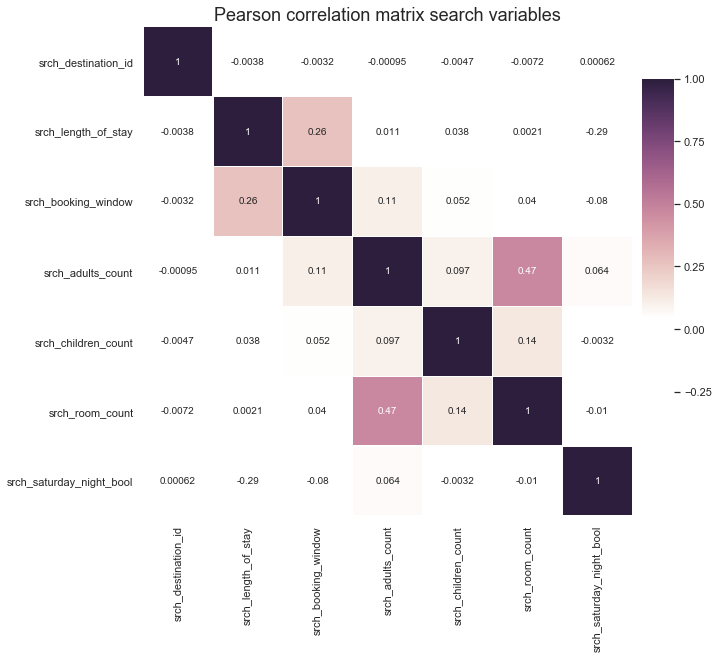

In [128]:
# Groups of attributes, index found from table given in the assignment
visitor = list(range(3,6))
prop = list(range(6,17))
prop.remove(14)
srch = list(range(17,24))
target = list(range(51,54))
target.append(14)

correlation_heatmap(train_small_pkl.iloc[:,prop+target],'Pearson correlation matrix Property variables'')
correlation_heatmap(train_small_pkl.iloc[:,srch],'Pearson correlation matrix search variables')
# plt.savefig("pearson_corr_search.pdf", bbox_inches = 'tight')



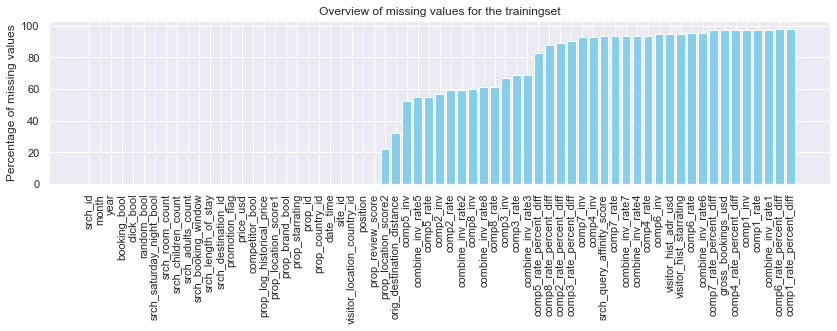

In [129]:
sns.set()

fig, ax = plt.subplots(figsize=(14,3))
missing = train_small_pkl.isnull().sum()/len(train_small_pkl)*100
missing.sort_values(inplace=True)
plt.xticks(rotation=90)
plt.ylabel("Percentage of missing values")
plt.title("Overview of missing values for the trainingset")
plt.bar(missing.index, height = missing, color="skyblue")

# plt.savefig("missingvalues.pdf", bbox_inches = 'tight')

In [13]:
# train_small_pkl


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,booking_bool,combine_inv_rate1,combine_inv_rate2,combine_inv_rate3,combine_inv_rate4,combine_inv_rate5,combine_inv_rate6,combine_inv_rate7,combine_inv_rate8,competitor_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,0.0,1


In [6]:
# EDA
count_non_nan = train_small_pkl.count()

In [15]:
print(train_small_pkl["srch_id"].count())
print(train_small_pkl["srch_id"].nunique())
print(train_small_pkl["date_time"].count())
print(train_small_pkl["date_time"].nunique())

4958347
199795
4958347
198615


have almost 5 million rows, but these retain from 199.795 unique searches. This means that per search about 25 hotels are shown.
Indeed there are 199.795 unique searches, but the srch_id column has gaps! For example the first id's are: 1,4,6,8,11
Range of number of hotels shown in a search is [5,38] consecutive (no missing number in this range)

In [17]:
print(train_small_pkl["prop_id"].count())
print(train_small_pkl["prop_id"].nunique())

4958347
129113


129.113 unique hotels ID's

In [18]:
count_unique = train_small_pkl.nunique()
# count_unique

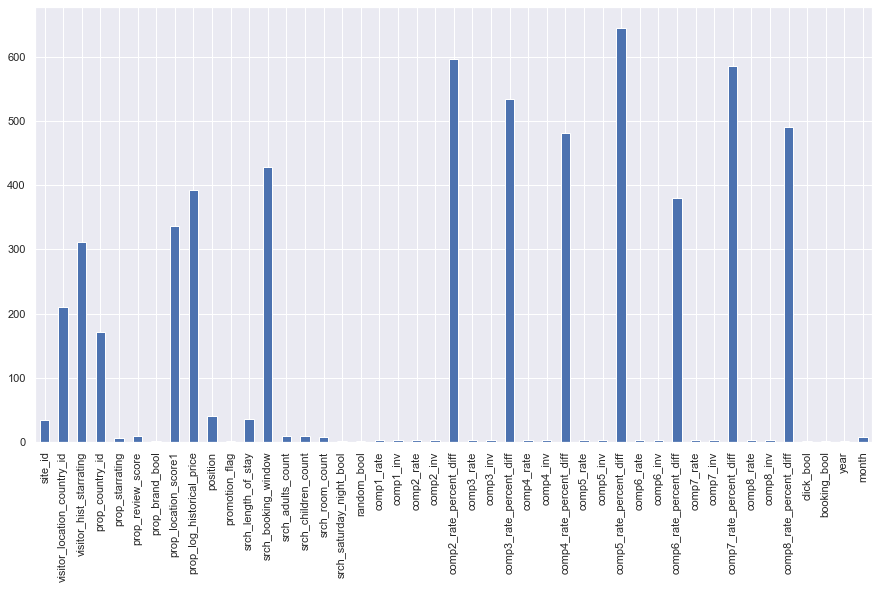

In [19]:
less_unique = count_unique.drop(labels=["srch_id", "date_time", "prop_id", "price_usd",
                                            "srch_query_affinity_score", "orig_destination_distance",
                                            "gross_bookings_usd", "srch_destination_id", "visitor_hist_adr_usd",
                                            "prop_location_score2", "comp1_rate_percent_diff"])
plt.figure(figsize=(15,8))
less_unique.plot.bar(width=0.5)

5
38
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


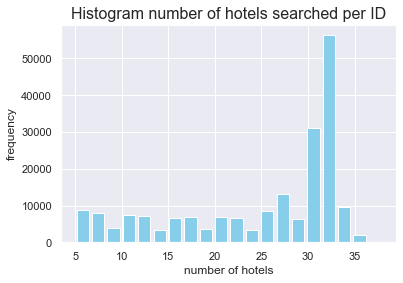

In [135]:
def number_of_hotels_per_search(df):

    grouped_searches = train_small_pkl.groupby('srch_id')[['prop_id']].count()
    grouped_searches.sort_values('prop_id').reset_index()
    grouped_searches.columns = ['nr_hotels']
    nr_hotels = grouped_searches['nr_hotels'].unique()
    print(min(nr_hotels))
    print(max(nr_hotels))
    print(sorted(nr_hotels))
    plt.hist(grouped_searches['nr_hotels'], bins=20,rwidth=0.8, color='skyblue')
    plt.title('Histogram number of hotels searched per ID', fontdict={'fontsize':16})
    plt.ylabel('frequency')
    plt.xlabel('number of hotels')
  

number_of_hotels_per_search(train_small_pkl)
# plt.savefig("histogram_nmrsearches.pdf", bbox_inches = 'tight')

feature selection, testing correlations


In [21]:
pearson_corr = train_small_pkl.corr()

In [14]:
# pearson_corr.head(4)

In [15]:
# checking what variables have high correlation with search_id and property_id
# pearson_corr.iloc[0].sort_values()
# pearson_corr.prop_id.sort_values()

Both variables individually have low correlation to other individual variables, not one corr >0.1

In [153]:
corr_matrix = pearson_corr.abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

top_ten_allvariables = sol.head(10).index.tolist()
sol
# top_ten_allvariables
# top ten most correlated variables.(minus year-month obvisouly)

year                         month                        0.896758
click_bool                   booking_bool                 0.782889
comp5_rate                   comp8_rate                   0.636605
comp3_rate_percent_diff      comp8_rate_percent_diff      0.634962
                             comp5_rate_percent_diff      0.590658
comp1_inv                    comp5_inv                    0.512121
comp4_rate                   comp8_rate                   0.510133
comp2_rate                   comp3_rate                   0.510067
comp6_rate                   comp7_rate                   0.510059
comp5_rate_percent_diff      comp8_rate_percent_diff      0.508339
visitor_hist_starrating      visitor_hist_adr_usd         0.498618
visitor_location_country_id  prop_country_id              0.482787
comp2_rate                   comp8_rate                   0.478181
comp1_rate                   comp5_rate                   0.475955
srch_adults_count            srch_room_count              0.47

comp5_rate vs comp8_rate 2nd highest correlation. Furthemore, the highest overall correlation seems to come from the competation variables in between hotels (rate, inv, percentages)

Previous behaviour seems to correlate high with each other
location ID with location Hotel high corr

investigating competators variables


In [183]:
sns.set()

compare_cols = ["comp1_rate", "comp2_rate", "comp3_rate", "comp4_rate", "comp5_rate",
                "comp6_rate", "comp7_rate", "comp8_rate"]
total_diff_rate = []
[total_diff_rate.append(np.mean(train_small_pkl[col])) for col in compare_cols]


compare_cols_inv = ["comp1_inv", "comp2_inv", "comp3_inv", "comp4_inv", "comp5_inv",
                "comp6_inv", "comp7_inv", "comp8_inv"]
total_diff_inv = []
[total_diff_inv.append(np.mean(train_small_pkl[col])) for col in compare_cols_inv]



def showcompareplot(compare_cols, total_diff, title):
    fig, ax = plt.subplots(figsize=(10,5))
    # ax.set(ylabel='Total mean of the variable', title=title)
    plt.title(title,fontdict={'fontsize':16})
    plt.ylabel('Total mean of the variable')
    plt.bar(compare_cols, total_diff, label='positive means competitors (avg)price is higher than Expedia', color='skyblue',width=0.9)
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    
# showcompareplot(compare_cols, total_diff_rate, "price Expedia compared to competitors 1 until 8")
# plt.savefig("price EX.pdf", bbox_inches = 'tight')

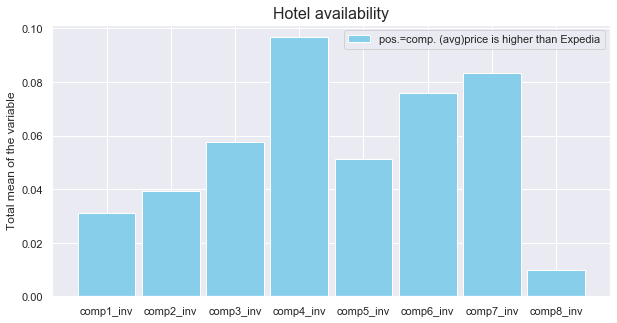

In [175]:
# showcompareplot(compare_cols_inv, total_diff_inv, "Hotel availability")
# plt.savefig("availEX.pdf", bbox_inches = 'tight')

+1 if competitor i does not have availability in the hotel; 0 if both Expedia and competitor 1 have availability; null signifies there is no competitive data

On average competator 4 and 8 have a negative value for comp_rate. This means that they are cheaper priced than Expedia. However, in the figure following it shows that on average competator 1 tm 7 have less availability than expedia. Competator 8 has the lowest availability disadvantage compared to expedia.

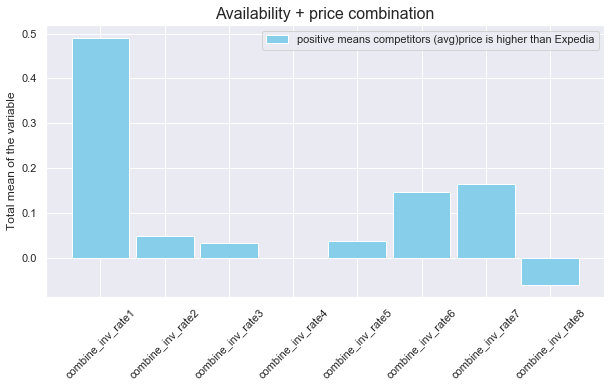

In [185]:
# Add comp_inv and comp_rate together 
for i in range (len(compare_cols)):
    train_small_pkl["combine_inv_rate" + str(i + 1)] = train_small_pkl[compare_cols_inv[i]] + train_small_pkl[compare_cols[i]]

compare_cols_total = ["combine_inv_rate1", "combine_inv_rate2", "combine_inv_rate3", "combine_inv_rate4",
                      "combine_inv_rate5", "combine_inv_rate6", "combine_inv_rate7", "combine_inv_rate8"]
total_diff_tot = []
[total_diff_tot.append(np.mean(train_small_pkl[col])) for col in compare_cols_total]
    
showcompareplot(compare_cols_total, total_diff_tot, "Availability + price combination")
# plt.savefig("combine_inv_rateEX.pdf", bbox_inches = 'tight')

From the total average of rate and availability it seems that competator 8 is more competative than expedia.

In [176]:
# # # Make a new column for when there exists a competitor, that is when the comp_rate_inv is not null
# competitor_bools = []

# for index, row in train_small_pkl.iterrows():
#     comp_bool = 0
    
#     # compare_cols_total exists of a column of data from comp_rate and comp_inv,
#     # so, a combination of competitor price and room-availability. 
#     for competitor in compare_cols_total:
#         if pd.isnull(row[competitor]):
#             comp_bool = 1
#     competitor_bools.append(comp_bool)
# train_small_pkl["competitor_bool"] = competitor_bools

In [50]:
 competitor_bools=[]

 for index, row in train_small_pkl.iterrows():
    comp_bool = 0
    
    # compare_cols_total exists of a column of data from comp_rate and comp_inv,
    # so, a combination of competitor price and room-availability. 
    for competitor in compare_cols_total:
        if(row[competitor]==-1 or row[competitor]== 0 or row[competitor]==1):
            comp_bool = 1
    competitor_bools.append(comp_bool)
train_small_pkl["competitor_bool"] = competitor_bools

In [253]:
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    # plt.show()

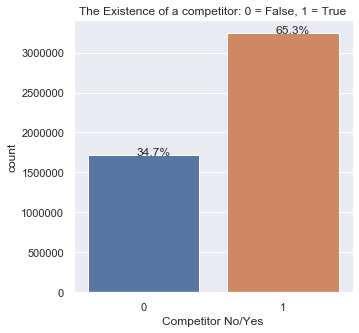

In [254]:

plt.figure(figsize=(5, 5))
ax = sns.countplot(x="competitor_bool",data=train_small_pkl,label = '0 is false')
plt.title("The Existence of a competitor: 0 = False, 1 = True")
plt.xlabel('Competitor No/Yes')
without_hue(ax,train_small_pkl.competitor_bool)


# plt.savefig("competitor_exist.pdf", bbox_inches = 'tight')



# patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=t) for i,t in enumerate(t.get_text() for t in ax.get_xticklabels())]
# plt.legend(handles=patches, loc="upper left")    


# plt.legend()

# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
# plt.show()



In [ ]:
# 

In [ ]:
# # Drop all other comp_rate and comp_inv columns:
# df = df.drop(compare_cols_inv, axis=1)
# df = df.drop(compare_cols, axis=1)
# df = df.drop(compare_cols_total, axis=1)

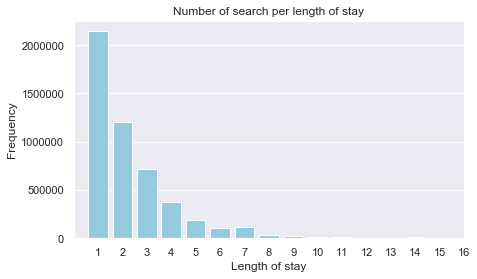

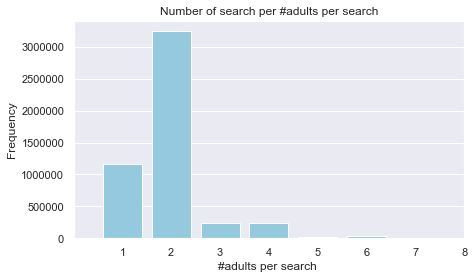

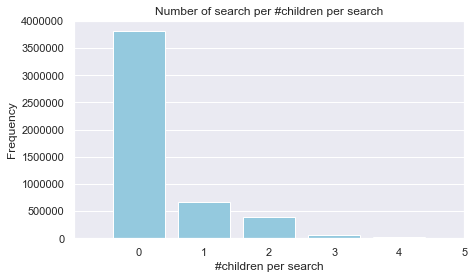

In [261]:

def count_figure_maker(df,x_data, x_label, y_label, title, xlim):

    plt.figure(figsize=(7, 4))
    countplot = sns.countplot(x= x_data, data=train_small_pkl,color='skyblue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    countplot.set_xlim(-1,xlim)
    # plt.ticker.LogFormatterSciNotation
    # plt.show()

count_figure_maker(train_small_pkl, 'srch_length_of_stay', 'Length of stay', 'Frequency', "Number of search per length of stay", 15)
count_figure_maker(train_small_pkl, 'srch_adults_count', '#adults per search ', 'Frequency', "Number of search per #adults per search", 7)
count_figure_maker(train_small_pkl, 'srch_children_count', '#children per search', 'Frequency', "Number of search per #children per search", 5)
# plt.savefig("#children.pdf", bbox_inches = 'tight')


most searched: LOS=1, for 2 adults and no children

top ten most visited countries
219    2892489
100     495476
55      290461
216     217385
220     174296
129     123681
31       92636
99       67762
59       62066
92       45213
Name: visitor_location_country_id, dtype: int64


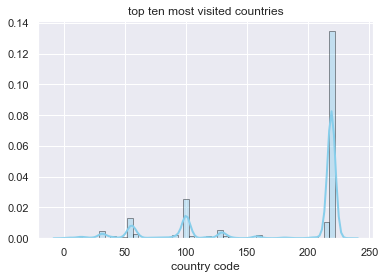

In [262]:
# Get five most frequent countries 
print("top ten most visited countries")
print(train_small_pkl['visitor_location_country_id'].value_counts()[:10])

sns.distplot(df['visitor_location_country_id'], label="User country", color = 'skyblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 2})
plt.title('top ten most visited countries')
plt.xlabel('country code')
# plt.savefig("country_density.pdf", bbox_inches = 'tight')

top_ten_countries = train_small_pkl['visitor_location_country_id'].value_counts()[:10].index.tolist()

In [119]:
top_ten

[219, 100, 55, 216, 220, 129, 31, 99, 59, 92]